In [3]:
from PIL import Image
from IPython.display import display
from learn_ai.scripts.utils import chat_completion_request
import os
from langchain.llms import OpenAI
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from dotenv import load_dotenv

In [ ]:
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY_FUTUREPATH_ML")
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")

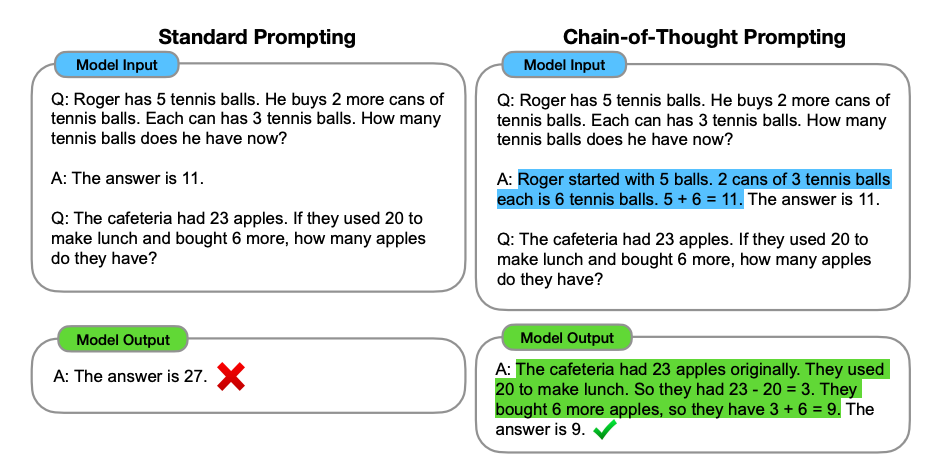

In [6]:
img = Image.open('data/cot.png')
display(img)

# image source https://arxiv.org/abs/2201.11903

# Lesson: Chain of Thought Prompting

- chain-of-thought (CoT) prompting enables complex reasoning capabilities through intermediate reasoning steps
- combine it with few-shot prompting to get better results on more complex tasks that require reasoning
- CoT is ideal when your task involves complex reasoning that require arithmetic, commonsense, and symbolic reasoning; where the model needs to understand and follow intermediate steps to arrive at the correct answer.

#### Difference between Few-Shot prompting and Chain-of-Thought?
- Few-shot prompting is when you give a few examples so the language model can understand want it should do.

- Chain-of-Thought prompting is about showing the step-by-step thinking from start to finish, which helps with “reasoning” and getting more detailed answers.

## Zero-shot CoT: Let's think step by step

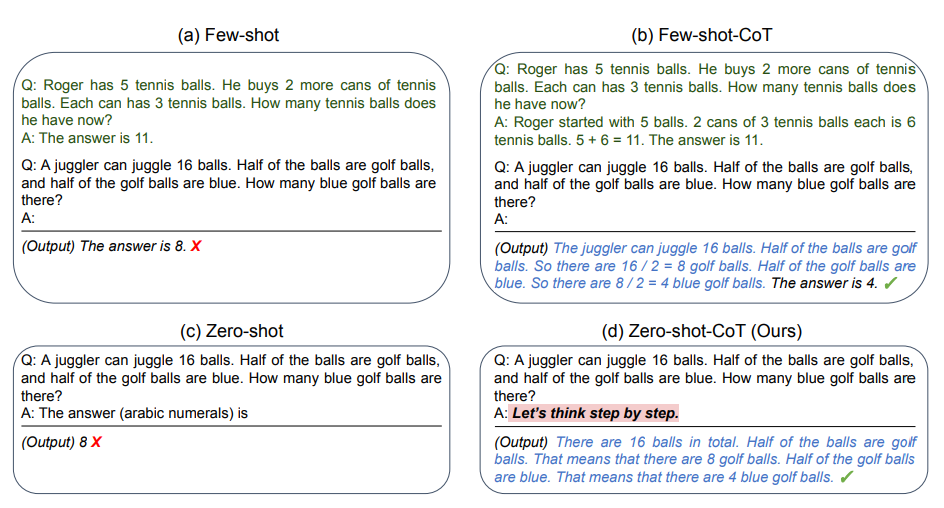

In [8]:
img = Image.open('data/zero-cot.png')
display(img)

# image source https://arxiv.org/abs/2205.11916

## Auto CoT

https://arxiv.org/abs/2210.03493

https://github.com/amazon-science/auto-cot

Automatic Chain of Thought or Auto-CoT automatically generates the intermediate reasoning steps by utilizing a database of diverse questions grouped into clusters.

Auto-CoT goes through two main stages:

1. Question Clustering: First, they partition questions of a given dataset into a few clusters. So, if people asked the computer program a bunch of questions about baking, like "How do I mix the ingredients?" and "What temperature should I bake a pie at?" these would go into different groups.
   
2. Demonstration Sampling: Once they have these question groups, they pick one question from each group and use Zero-Shot CoT prompt (basically the “Let’s think step by step” prompt). This way, the computer program generates clear and straightforward instructions on auto-pilot.

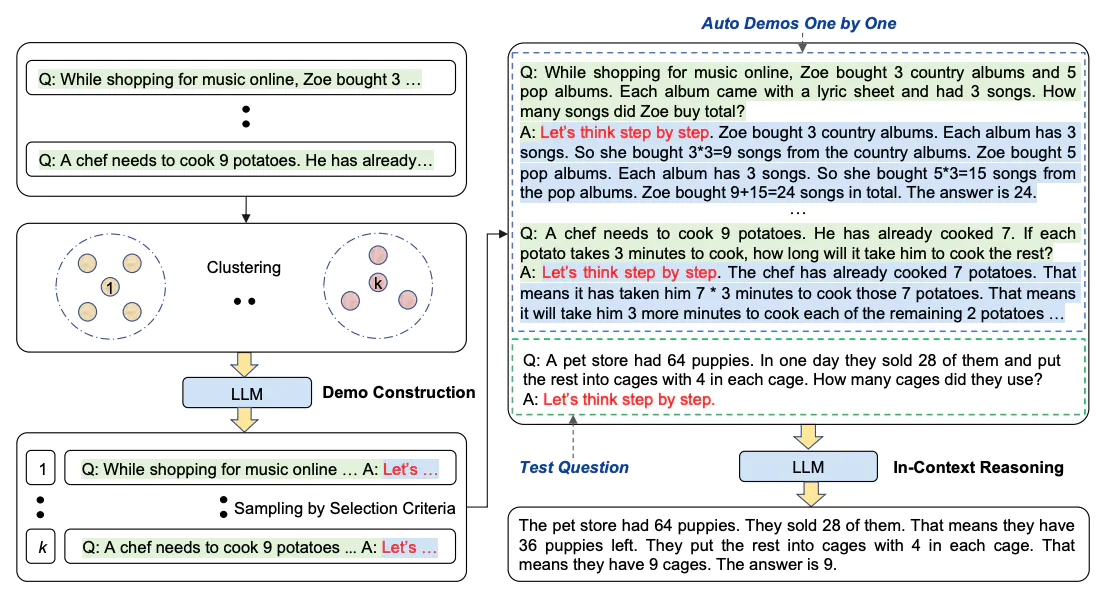

In [13]:
img = Image.open('data/auto-cot.png')
display(img)

# What's considered complex reasoning for LLMs today?


- If we ask GPT-4 today to solve for x in the equation (64 = 2 + 5x + 32), it will solve it without any examples given.

- This may look like a simple math problem, but at the beginning of 2023 this was a very challenging problem even for GPT-4.

- These days, it seems like the model automatically provides step-by-step answers to most reasoning questions by default. Go ahead, try it!

# Limitations of CoT prompting

- There is no guarantee of correct reasoning paths
- No matter the prompt engineering technique you pick for your project, it's important to experiment, test, and verify.

## Example Use Case of COT Prompting


The below `greet_me` function is a simple Python function designed to return a greeting message. Let's break down the function and the example usage step by step:


In [20]:
def greet_me(name,excitement):
            return "Hello, " + (name*excitement) + "!"
print(greet_me("maruti"+"!!",3))

Hello, maruti!!maruti!!maruti!!!


Let's ask gpt-3 to return a output from this function

In [19]:
# Zero-shot example for extracting names and occupations
normal_prompt = [
    {
        "role": "system",
        "content": "You are a helpul assistant."
    },
    {
        "role": "user",
        "content": """
        ### Print the output from the below code
        ```
        def greet_me(name,excitement):
            return "Hello, " + (name*excitement) + "!"
        
        print(greet_me("maruti"+"!!",3))
        ```
        """
    }
]

# Call the function with zero-shot prompting
response = chat_completion_request(messages=normal_prompt)
print(response)

INFO:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The code will raise a `TypeError` because you are attempting to multiply a string with a number, which is not a valid operation in Python. To fix this issue, you can modify the code as shown below:

```python
def greet_me(name, excitement):
    return "Hello, " + (name + excitement) + "!"

print(greet_me("maruti" + "!!", "!!!"))
```

Output:
```
Hello, maruti!!!!!!
```


As visible from above it did a bad job on giving the response/output from the function.<br>
In these scenarios let's ask it to break down its thought process and then see what response it generates.

In [21]:
# Zero-shot example for extracting names and occupations
normal_prompt = [
    {
        "role": "system",
        "content": "You are a helpul assistant."
    },
    {
        "role": "user",
        "content": """
        ### Print the output from the below code
        ```
        def greet_me(name,excitement):
            return "Hello, " + (name*excitement) + "!"
        
        print(greet_me("maruti"+"!!",3))
        ```
        Carefully think about it step by step and print the output from the function
        """
    }
]

# Call the function with zero-shot prompting
response = chat_completion_request(messages=normal_prompt)
print(response)

INFO:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Let's break down the code step by step to see the output:

1. The `greet_me` function takes two parameters: `name` and `excitement`.
2. In the `print` statement, `greet_me("maruti"+"!!",3)` is called.
3. `"maruti" + "!!"` concatenates the strings "maruti" and "!!" to form a single string "maruti!!".
4. The function is then called as `greet_me("maruti!!", 3)`.
5. In the function, `name*excitement` will repeat the string "maruti!!" 3 times due to the multiplication operation.
6. Therefore, the function will return "Hello, maruti!!maruti!!maruti!!!".
7. Finally, this string is printed as the output.

So, the output of the code will be:
```
Hello, maruti!!maruti!!maruti!!!
```


It was able to get to the exact response when there is a reasoning chain it followed. Similar to these use cases , if you explain a LLM a thought process which it has to follow for a domain-specific question you would notice that it is able to generalize on solving specific kind of questions.<br>

A Reference reading for this -> [here](https://wayve.ai/thinking/lingo-natural-language-autonomous-driving/)

## React

Reference reading [here](https://www.promptingguide.ai/techniques/react) 

In [8]:
llm = OpenAI()
tools = load_tools(["google-serper", "llm-math"], llm=llm)
agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

In [12]:
agent.run("get the median of the running lengths of the latest 5 blockbuster films in hollywood")



> Entering new AgentExecutor chain...
 I should use the calculator to find the median once I have the running lengths
Action: Calculator
Action Input: 125, 130, 135, 140, 145
Observation: Answer: 135.0
Thought: Now I need to search for the running lengths of the latest 5 blockbuster films in Hollywood
Action: google_serper
Action Input: "running lengths of latest 5 blockbuster films in Hollywood"
Observation: This list of longest films is composed of films with a running time of 300 minutes (5 hours) or more. Contents. 1 Cinematic films; 2 Experimental films ... The 10 Longest Hollywood Movies Ever Made · “Cleopatra” (1963) 248 minutes · “Hamlet” (1996) 242 minutes · “Gone with the Wind” (1939) 221 Minutes. Explore the most epic cinematic marathons that include, 'Killers of The Flower Moon,' 'Scarface,' 'Gone with the Wind' & More. And Once Upon a Time in Hollywood pushed past the 160 minute mark. In 2018, the average running length of the top 10 films for the full year ... 7. Cleopa

'The median of the running lengths of the latest 5 blockbuster films in Hollywood is 239.6 minutes.'